In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Para preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

# Ignorar warnings (opcional)
import warnings
warnings.filterwarnings("ignore")

# 1. CARGA DE DATOS

df = pd.read_csv("/workspaces/machine-learning-python-templane/data/raw/diabetes.csv")


df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Dimensiones del dataset
print("Shape (filas, columnas):", df.shape)

# Información de tipos de datos y nulos
df.info()

# Descripción estadística de numéricas
df.describe()


Shape (filas, columnas): (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Detección de duplicados

In [4]:
print("Número de filas duplicadas:", df.duplicated().sum())

# Si quisieras eliminar duplicados:
# df = df.drop_duplicates()
# print("Shape tras eliminar duplicados:", df.shape)


Número de filas duplicadas: 0


Revisión rápida de valores nulos

In [5]:
print("Valores nulos totales por columna:")
print(df.isnull().sum())


Valores nulos totales por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# Información de tipos de datos y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# INVESTIGAR: ONE HOT ENCODING

In [8]:
# import pandas as pd
# import json

# def one_hot_encode_and_save(df, output_file='transformacion.json'):
#     """
#     Realiza One-Hot Encoding en un DataFrame, identifica automáticamente las columnas categóricas,
#     y guarda el resultado en un archivo JSON.

#     Parámetros:
#     df (pd.DataFrame): DataFrame a transformar.
#     output_file (str): Nombre del archivo de salida JSON (por defecto 'transformacion.json').
#     """
#     # Paso 2: Identificar columnas categóricas
#     # Las columnas categóricas suelen ser de tipo 'object' en pandas
#     categorical_columns = df.select_dtypes(include=['object']).columns
    
#     # Paso 3: Aplicar One-Hot Encoding
#     df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, prefix_sep='_')
    
#     # Paso 4: Guardar el resultado en un archivo JSON
#     # Convertimos el DataFrame a un diccionario y luego a JSON
#     df_encoded_dict = df_encoded.to_dict(orient='records')
#     with open(output_file, 'w') as json_file:
#         json.dump(df_encoded_dict, json_file, indent=4)
    
#     print(f"Dataset transformado guardado en {output_file}")

# # Ejemplo de uso de la función
# df = pd.read_csv("/workspaces/ejercicio_regresion_logistica/data/raw/bank-marketing-campaign-data.csv", sep=";")  # Asumiendo que ya tenemos un DataFrame cargado
# one_hot_encode_and_save(df)

a) Histplot para algunas variables numéricas

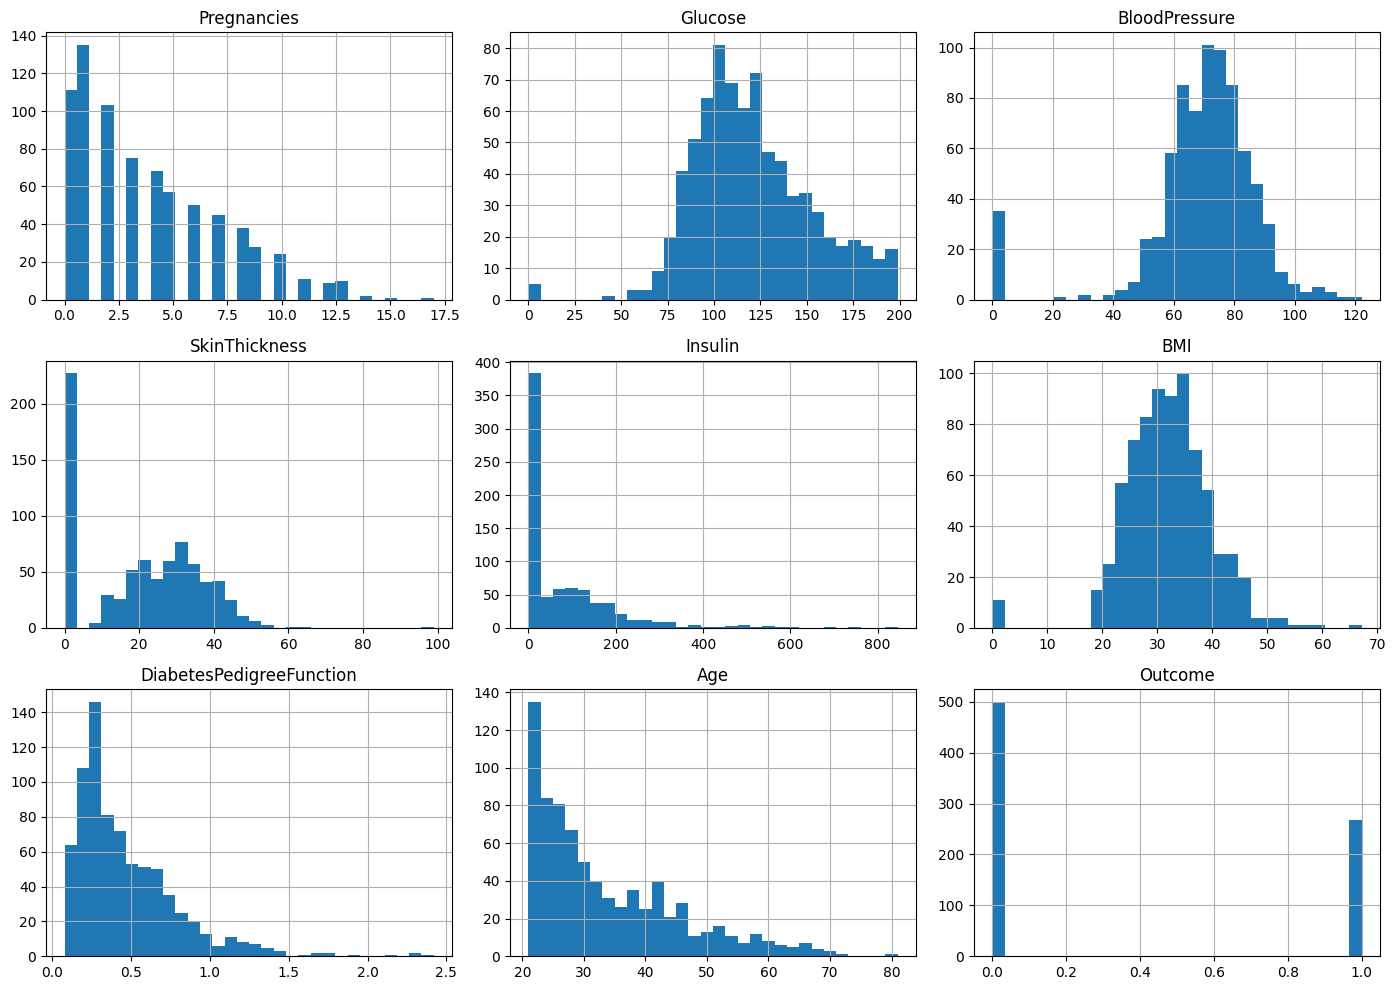

In [7]:
# Detectar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Generar histogramas para las columnas numéricas
df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()


b) Countplot para algunas variables categóricas

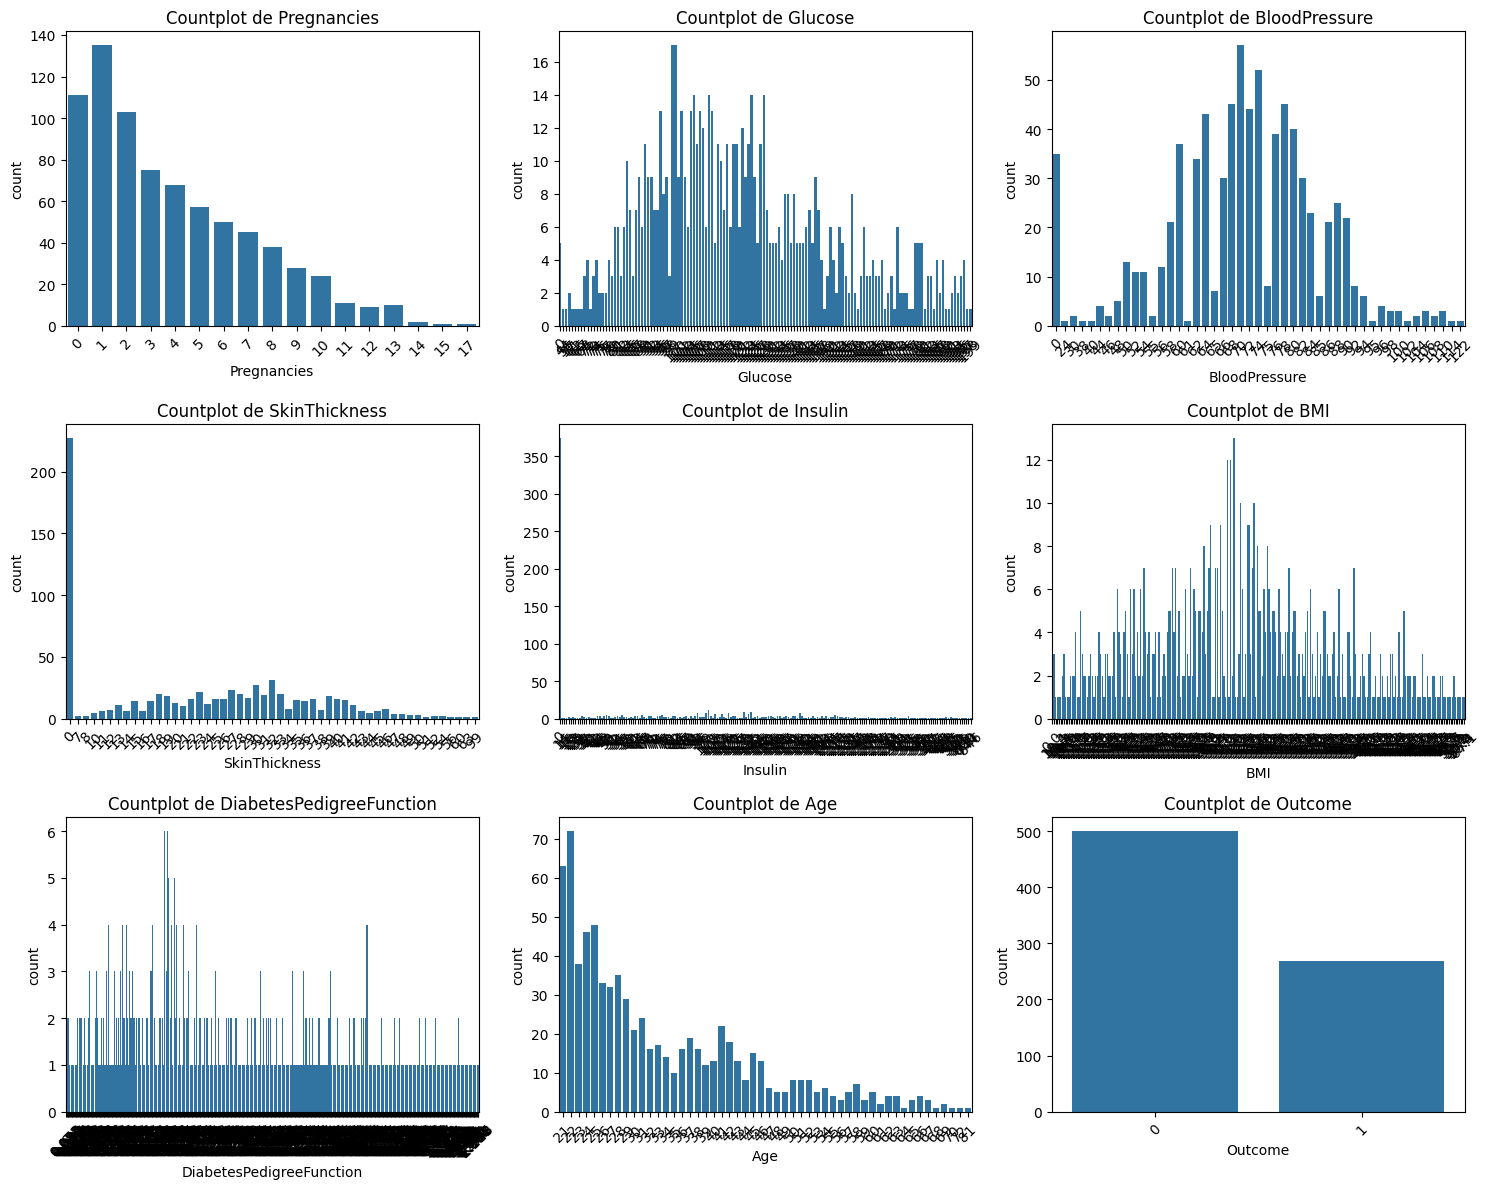

In [8]:
# Selecciona las columnas categóricas (tipo 'object')
categorical_cols = df.select_dtypes(include=['object', 'float64', 'int64']).columns

# Calcula el número de filas y columnas para los subplots
num_plots = len(categorical_cols)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # Asegúrate de tener suficientes filas

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"Countplot de {col}")
        axes[i].tick_params(axis='x', rotation=45)

# Oculta los ejes no utilizados
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


No hay columnas para graficar: Histograma


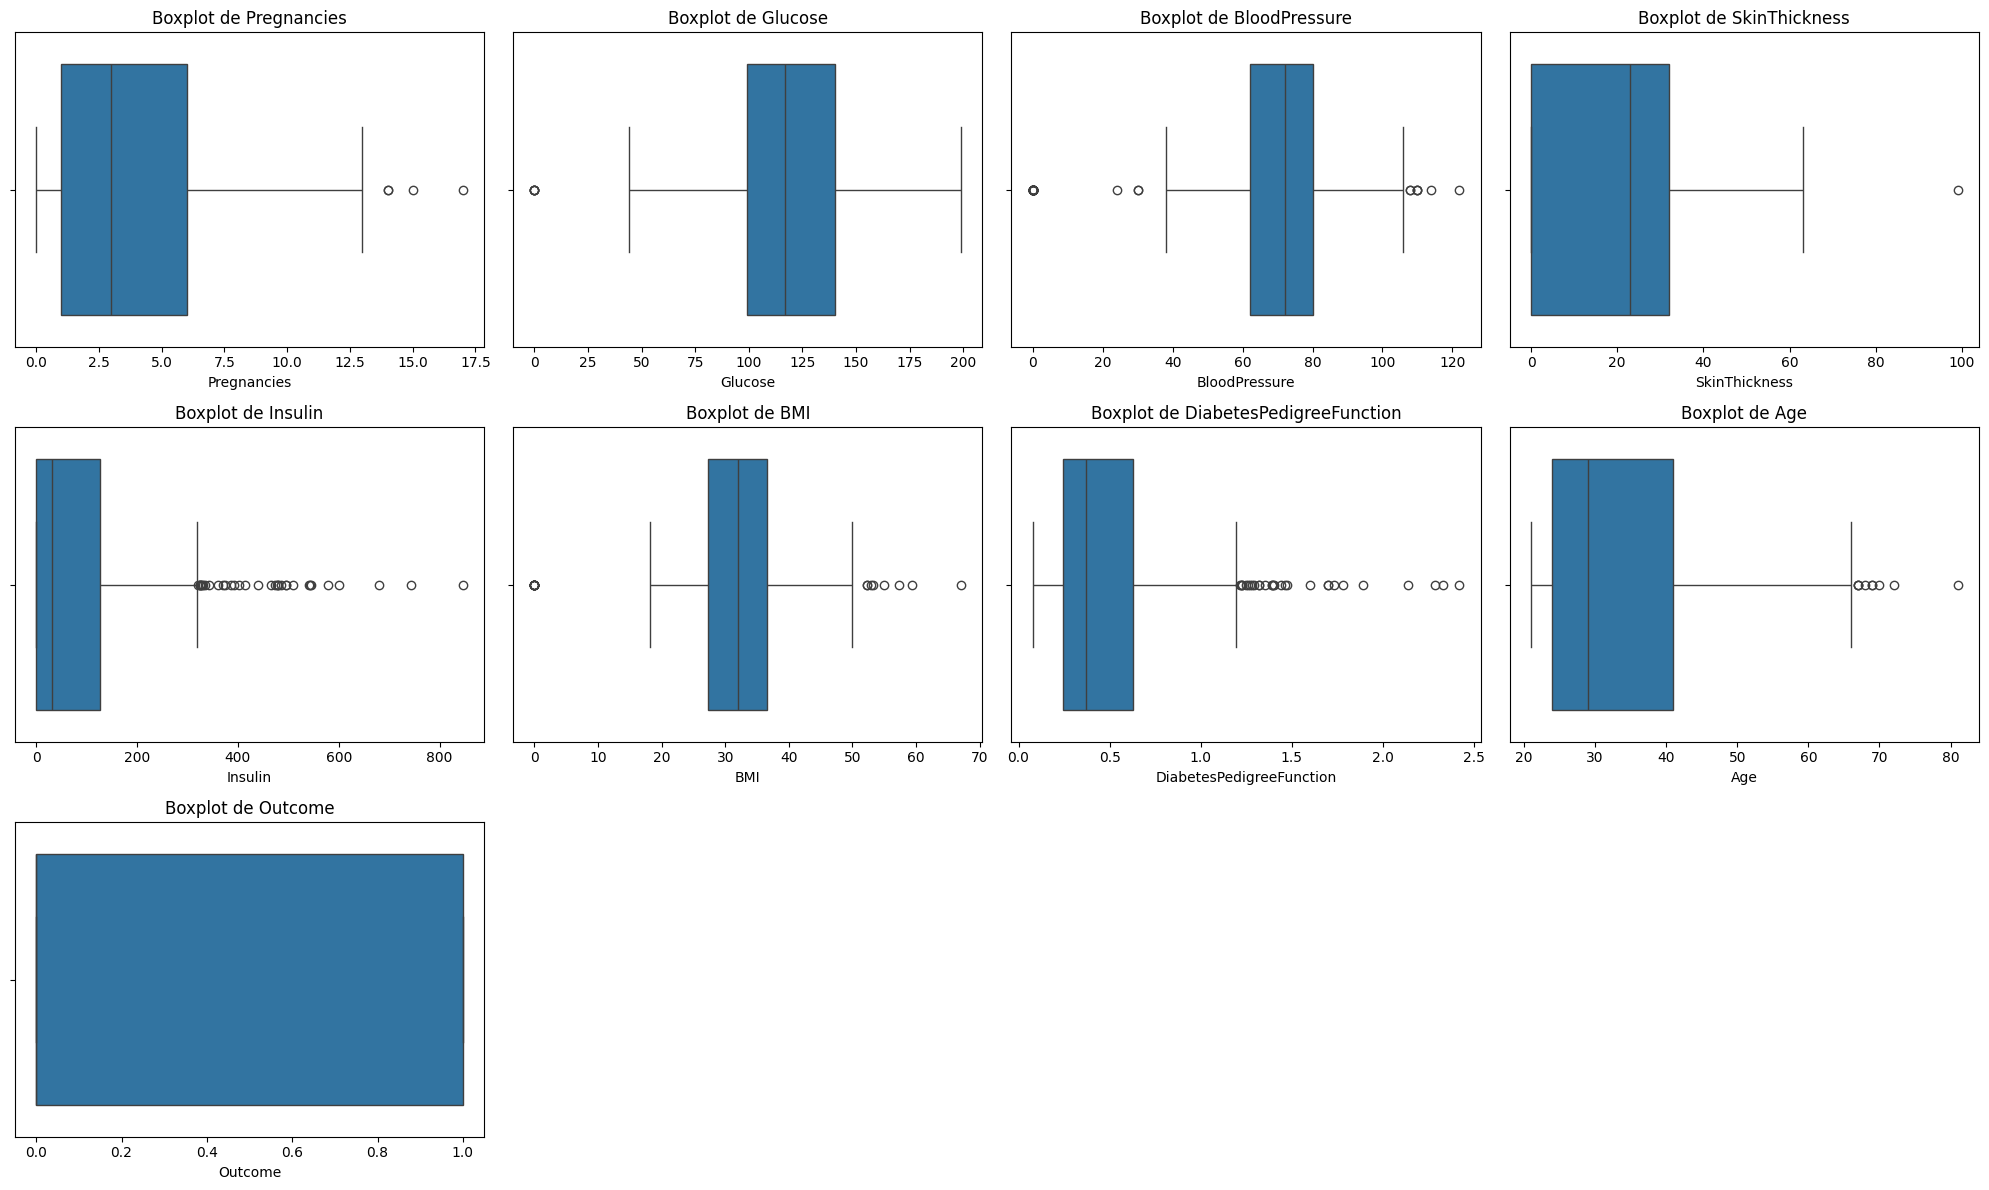

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Clasificar columnas según su tipo
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Definir función para gráficos en cuadrícula
def plot_grid(columns, plot_func, title, n_cols=3):
    if len(columns) == 0:
        print(f"No hay columnas para graficar: {title}")
        return

    n_rows = math.ceil(len(columns) / n_cols)  # Calcular número de filas
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()  # Asegurar compatibilidad con iteración

    for i, col in enumerate(columns):
        plot_func(df, col, axes[i])  # Función para graficar
        axes[i].set_title(f"{title} de {col}")

    # Ocultar los ejes sobrantes (si hay más espacios que gráficos)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Eliminar subgráficos vacíos

    plt.tight_layout()
    plt.show()

# Crear funciones específicas para histogramas y boxplots
def hist_plot(data, column, ax):
    sns.histplot(data=data, x=column, kde=True, ax=ax)

def box_plot(data, column, ax):
    sns.boxplot(data=data, x=column, ax=ax)

# Graficar variables categóricas (histogramas) si existen
plot_grid(categorical_cols, hist_plot, "Histograma", n_cols=3)

# Graficar variables numéricas (boxplots) si existen
plot_grid(numerical_cols, box_plot, "Boxplot", n_cols=4)


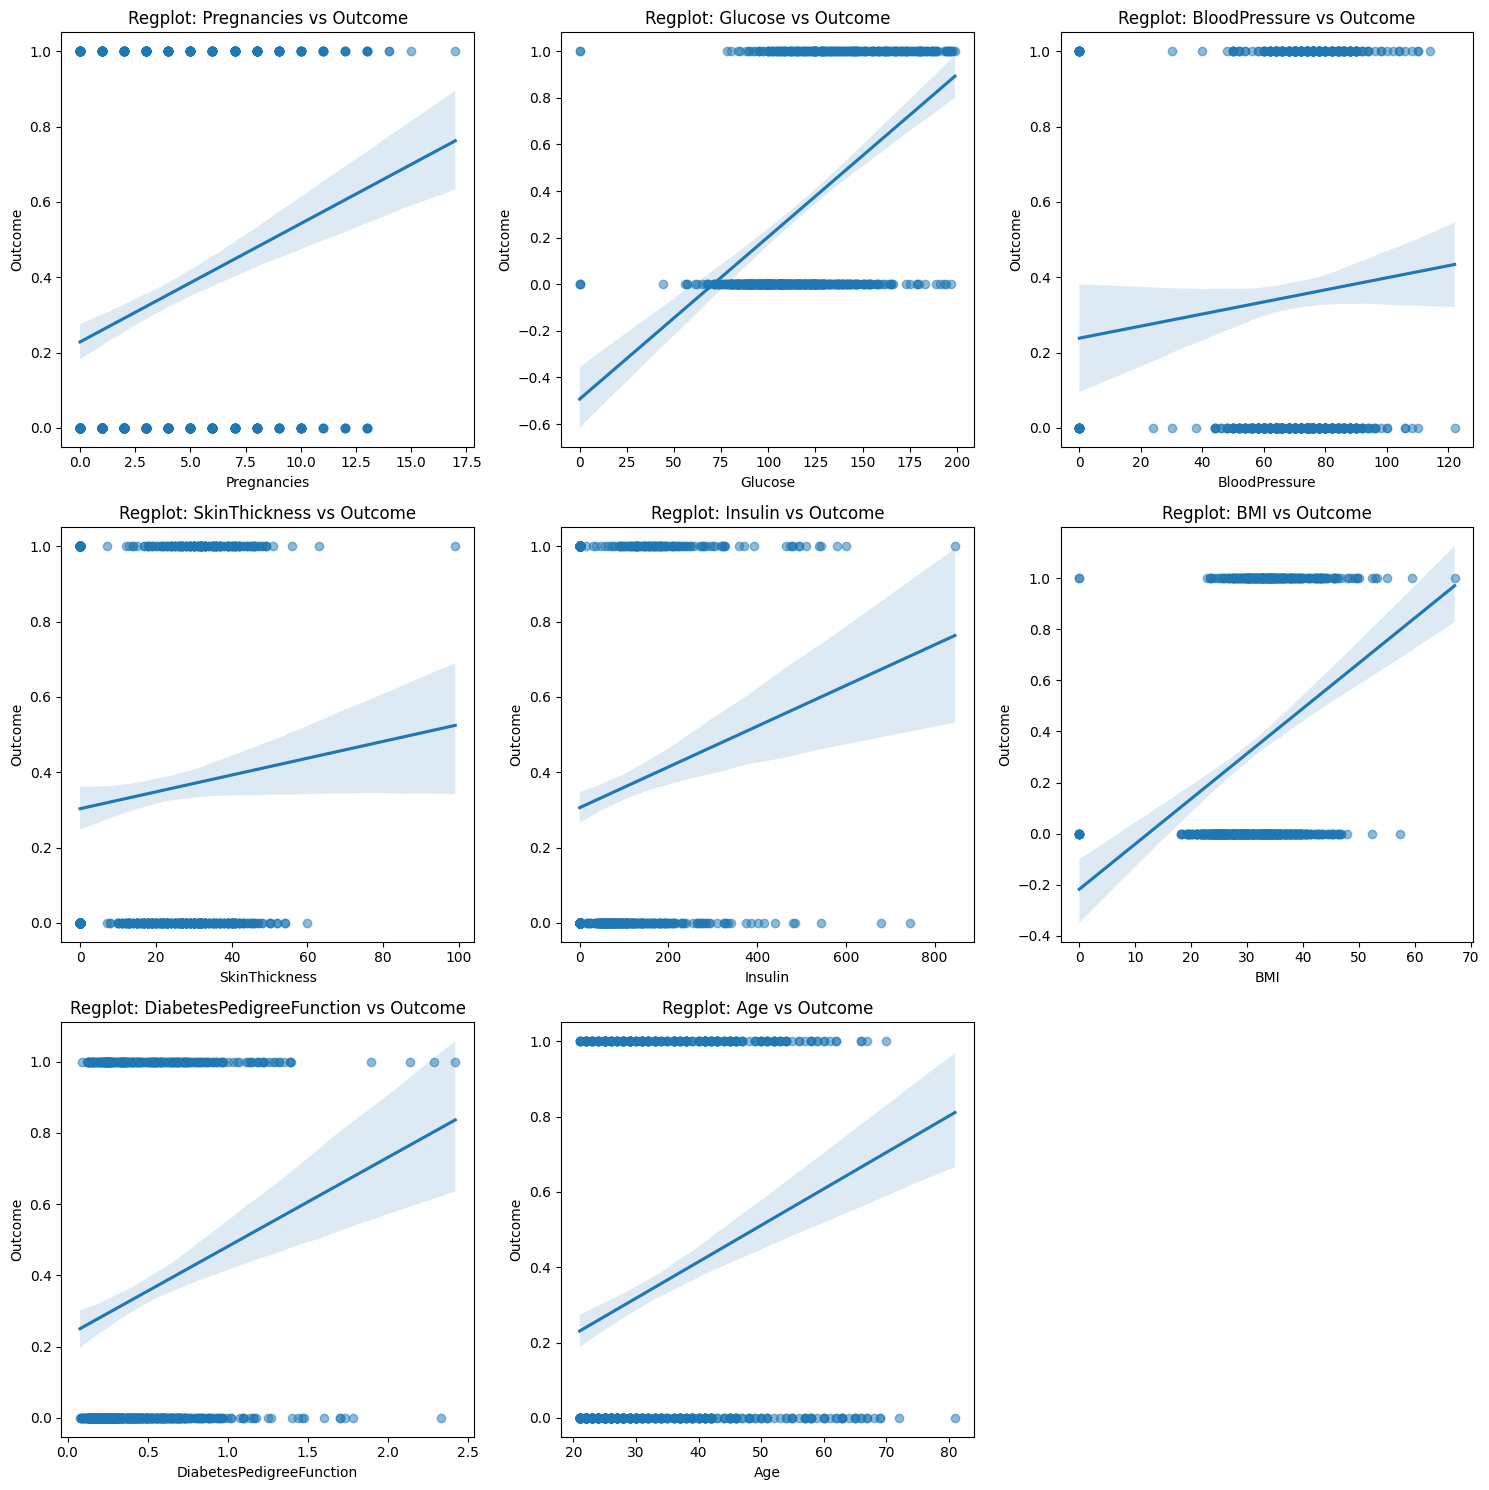

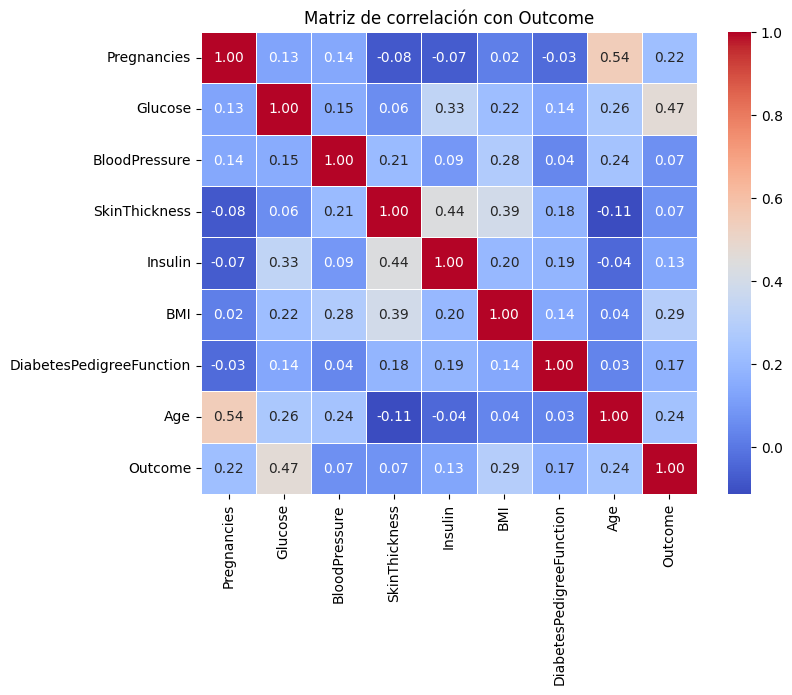

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Eliminar la variable objetivo "Outcome" de las columnas numéricas para evitar problemas de duplicación
numerical_cols = numerical_cols.drop("Outcome", errors="ignore")

# Configuración para subplots (3 gráficos por fila)
num_cols = 3  # Número de gráficos por fila
num_plots = len(numerical_cols)  # Número total de gráficos
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular filas necesarias

# Crear el espacio para subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurar que 'axes' sea una matriz plana para iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada columna y graficar en el espacio asignado
for i, col in enumerate(numerical_cols):
    sns.regplot(data=df, x=col, y="Outcome", ax=axes[i], scatter_kws={'alpha': 0.5})
    axes[i].set_title(f"Regplot: {col} vs Outcome")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Outcome")

# Eliminar ejes vacíos si hay menos gráficos que espacios creados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

# Heatmap con correlaciones de todas las variables numéricas respecto a 'Outcome'
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_cols].assign(Outcome=df["Outcome"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación con Outcome")
plt.show()



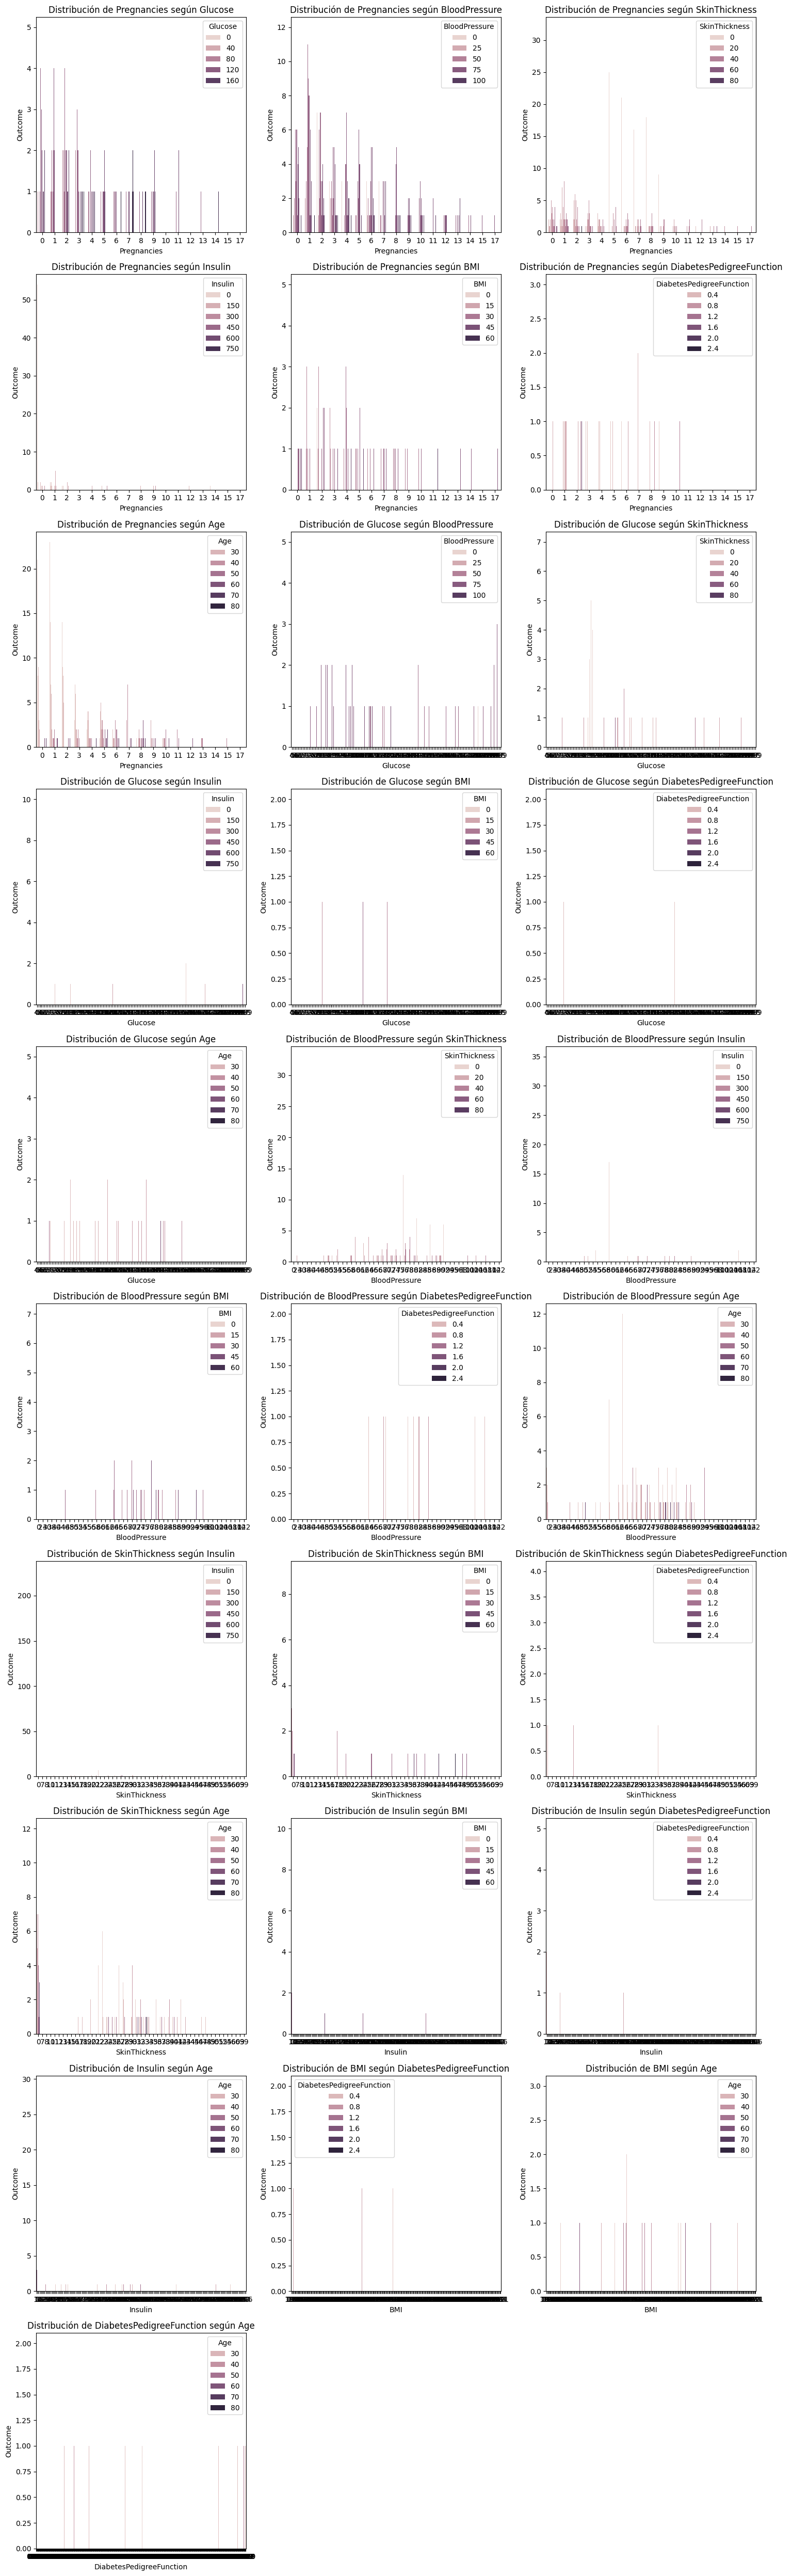

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools  # Para hacer combinaciones de pares de variables categóricas

# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['int64', 'float64']).columns

categorical_cols = categorical_cols.drop("Outcome", errors="ignore")

# Generar todas las combinaciones posibles de pares de variables categóricas
category_pairs = list(itertools.combinations(categorical_cols, 2))

# Calcular el número de filas necesarias
num_rows = (len(category_pairs) + 2) // 3  # Cada fila contiene 3 gráficos

# Crear subplots para cada combinación de variables categóricas, con 3 gráficos por fila
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Si solo hay una fila, convertir axes en una matriz para evitar errores de indexación
if num_rows == 1:
    axes = [axes]

# Graficar cada combinación de variables categóricas
for i, (cat1, cat2) in enumerate(category_pairs):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=cat1, hue=cat2, ax=axes[row, col])
    axes[row, col].set_title(f"Distribución de {cat1} según {cat2}")
    axes[row, col].set_xlabel(cat1)
    axes[row, col].set_ylabel("Outcome")

# Ocultar ejes vacíos
for i in range(len(category_pairs), num_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd
# import json

# def factorize_all_categoricals(df, save_json=True, json_filename="categorical_transformation_rules.json"):
#     """
#     Detecta todas las columnas categóricas en el DataFrame, las factoriza y guarda
#     el mapeo de transformación (valor original a código numérico) en un archivo JSON.
    
#     Se crea una nueva columna para cada columna categórica con el sufijo "_n".
    
#     Parameters:
#       df (pd.DataFrame): DataFrame de entrada.
#       save_json (bool): Si True, guarda el mapeo en un archivo JSON.
#       json_filename (str): Nombre del archivo JSON para guardar el mapeo.
      
#     Returns:
#       df (pd.DataFrame): DataFrame modificado con columnas factorizadas.
#       transformation_rules (dict): Diccionario con el mapeo de cada columna categórica.
#     """
#     # Detectar columnas categóricas
#     cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
#     transformation_rules = {}
    
#     for col in cat_cols:
#         # Factorizar la columna
#         codes, uniques = pd.factorize(df[col])
#         df[col + "_n"] = codes  # Nueva columna con los códigos
        
#         # Crear el mapeo: {valor_original: código}
#         mapping = {value: code for code, value in enumerate(uniques)}
#         transformation_rules[col] = mapping

#     # Guardar el mapeo en un archivo JSON si se desea
#     if save_json:
#         with open(json_filename, "w") as f:
#             json.dump(transformation_rules, f, indent=4)
#         print(f"Transformation rules saved in {json_filename}")

#     return df, transformation_rules

# # Ejemplo de uso:
# # Supongamos que ya tienes un DataFrame "df"
# df, transformation_rules = factorize_all_categoricals(df)

Transformation rules saved in categorical_transformation_rules.json


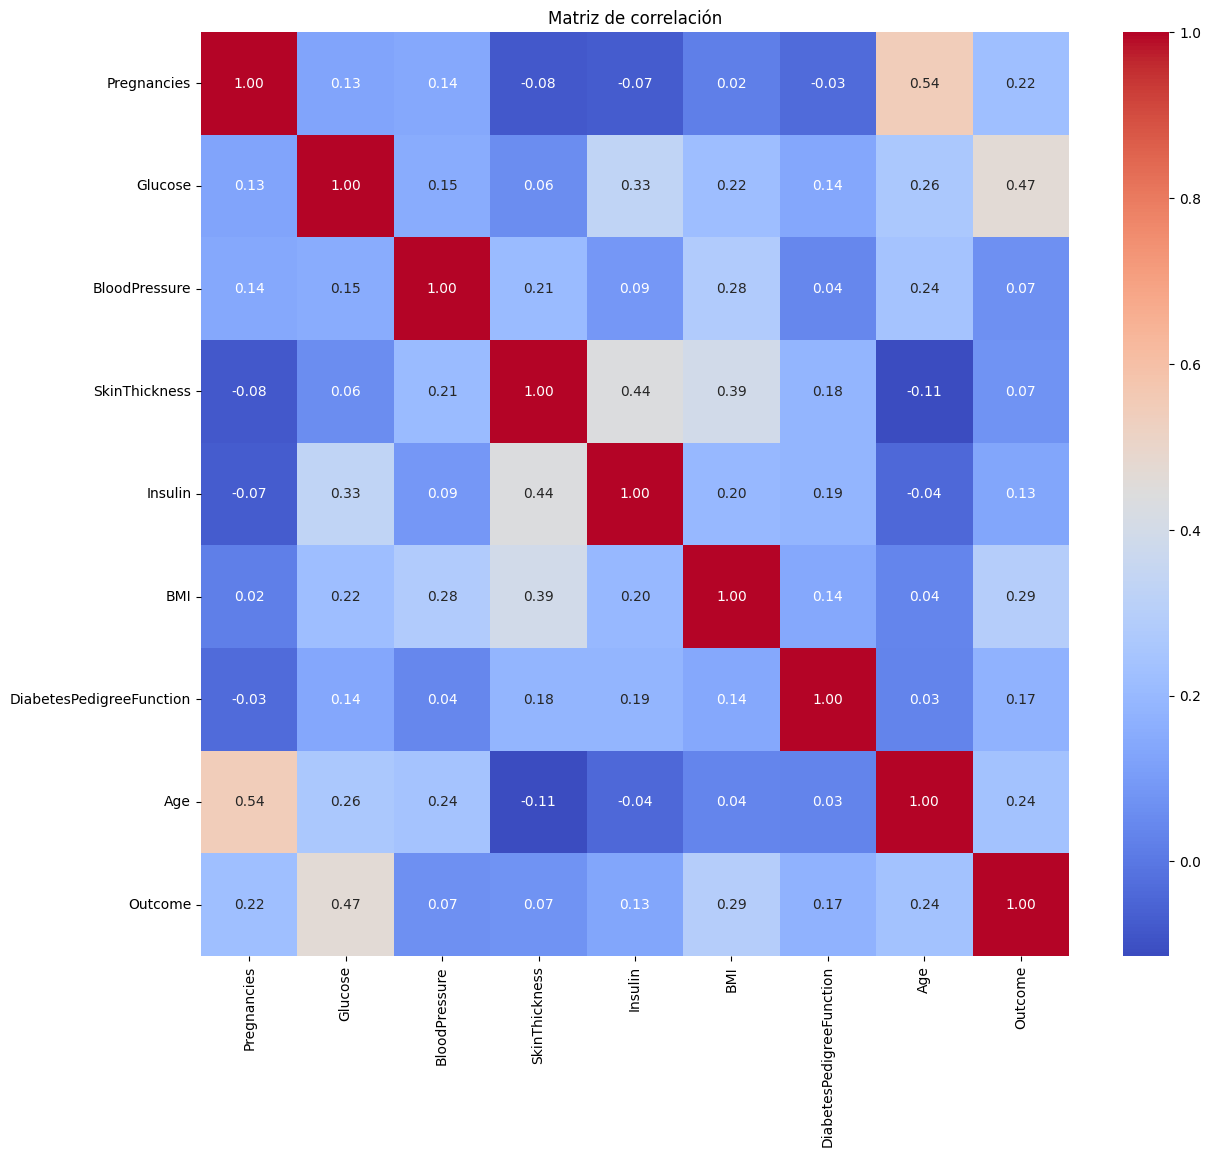

In [12]:

# # Ruta al archivo JSON con las reglas de factorización
# json_file_path = "/workspaces/ejercicio_regresion_logistica/src/categorical_transformation_rules.json"

# # Cargar el archivo JSON
# with open(json_file_path, 'r') as file:
#     factorization_rules = json.load(file)

# # Aplicar la factorización a las columnas categóricas según las reglas del archivo JSON
# for col, mapping in factorization_rules.items():
#     df[col + "_n"] = df[col].map(mapping)

# Seleccionar todas las columnas numéricas en el DataFrame
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Crear la matriz de correlación
corr_matrix = df[numeric_cols].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

Correlación (Heatmap) de las variables numéricas y categoricas

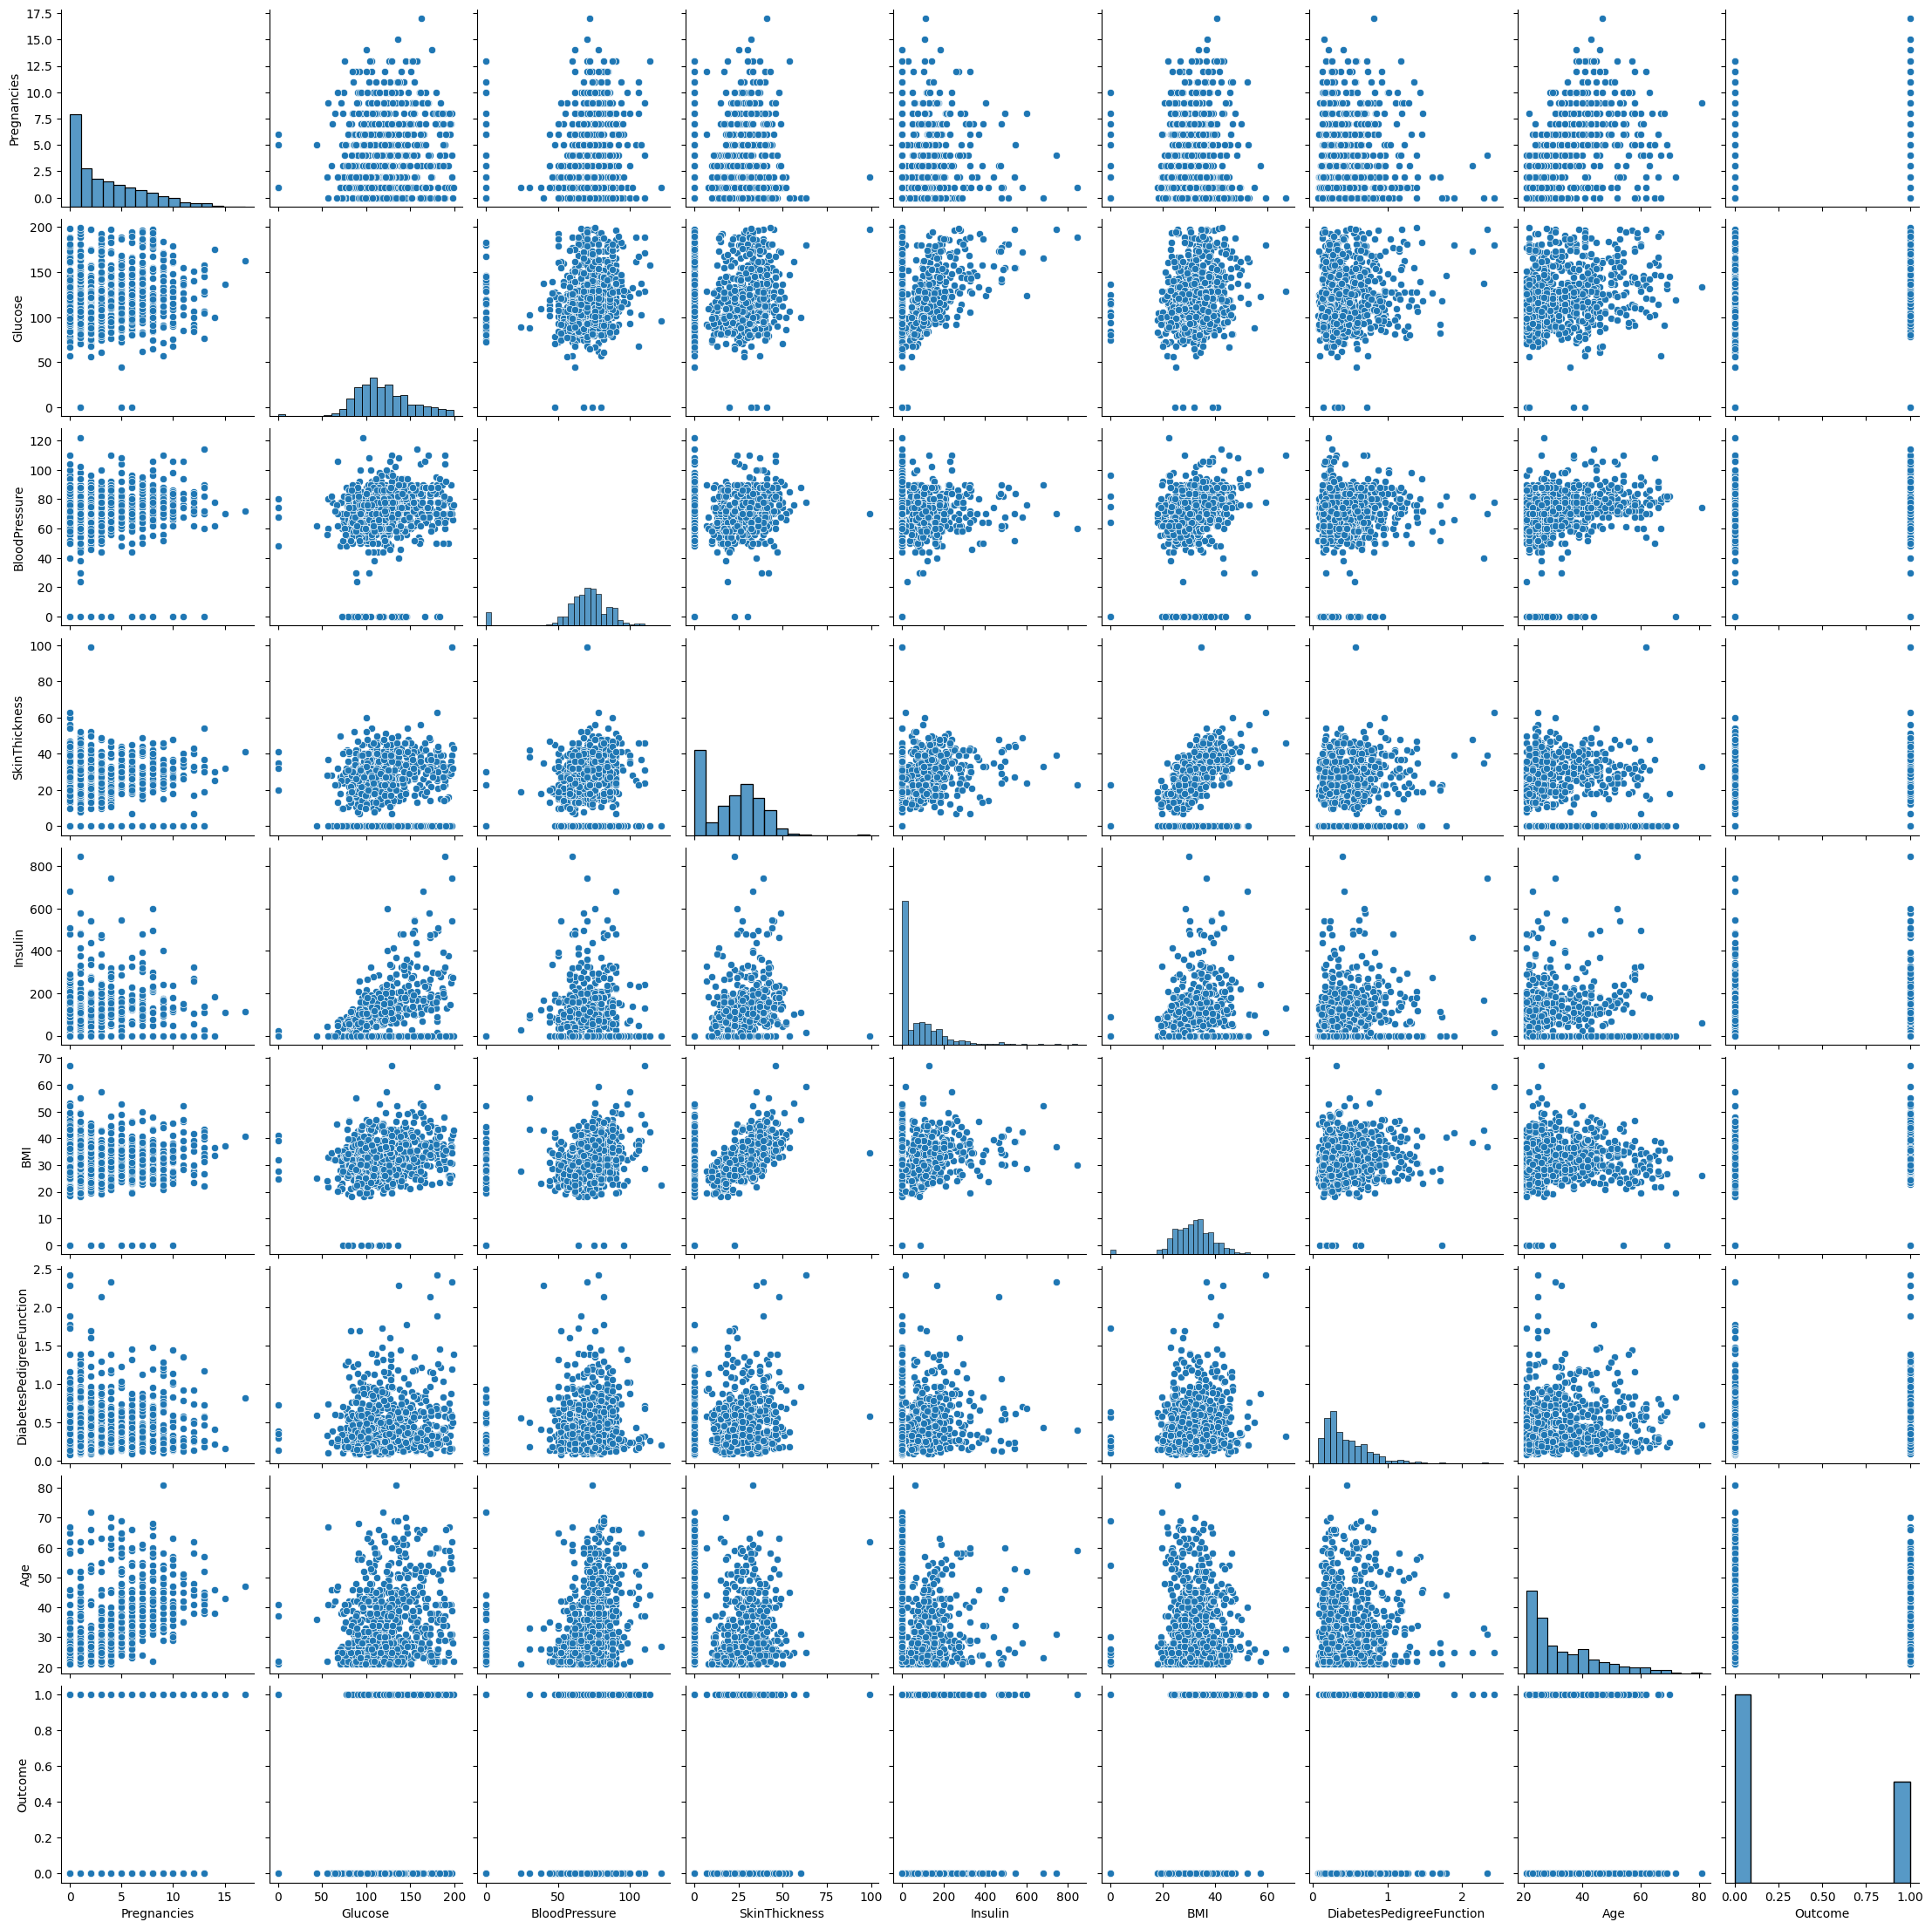

In [13]:
sns.pairplot(data = df)

In [14]:
import pickle

pickle_file_path = "dataframe_progreso.pkl"

with open(pickle_file_path, "wb") as file:
    pickle.dump(df, file)

print(f"Dataframe guardado existosamente en {pickle_file_path}")


Dataframe guardado existosamente en dataframe_progreso.pkl


In [16]:
import pickle  # Asegúrate de importar pickle antes de usarlo

# Ruta donde guardaste tu archivo Pickle
pickle_file_path = "/workspaces/machine-learning-python-templane/src/dataframe_progreso.pkl"

# Cargar el dataframe desde el archivo Pickle
with open(pickle_file_path, "rb") as file:  # "rb" significa "read binary"
    df = pickle.load(file)

print("Dataframe cargado exitosamente:")



Dataframe cargado exitosamente:


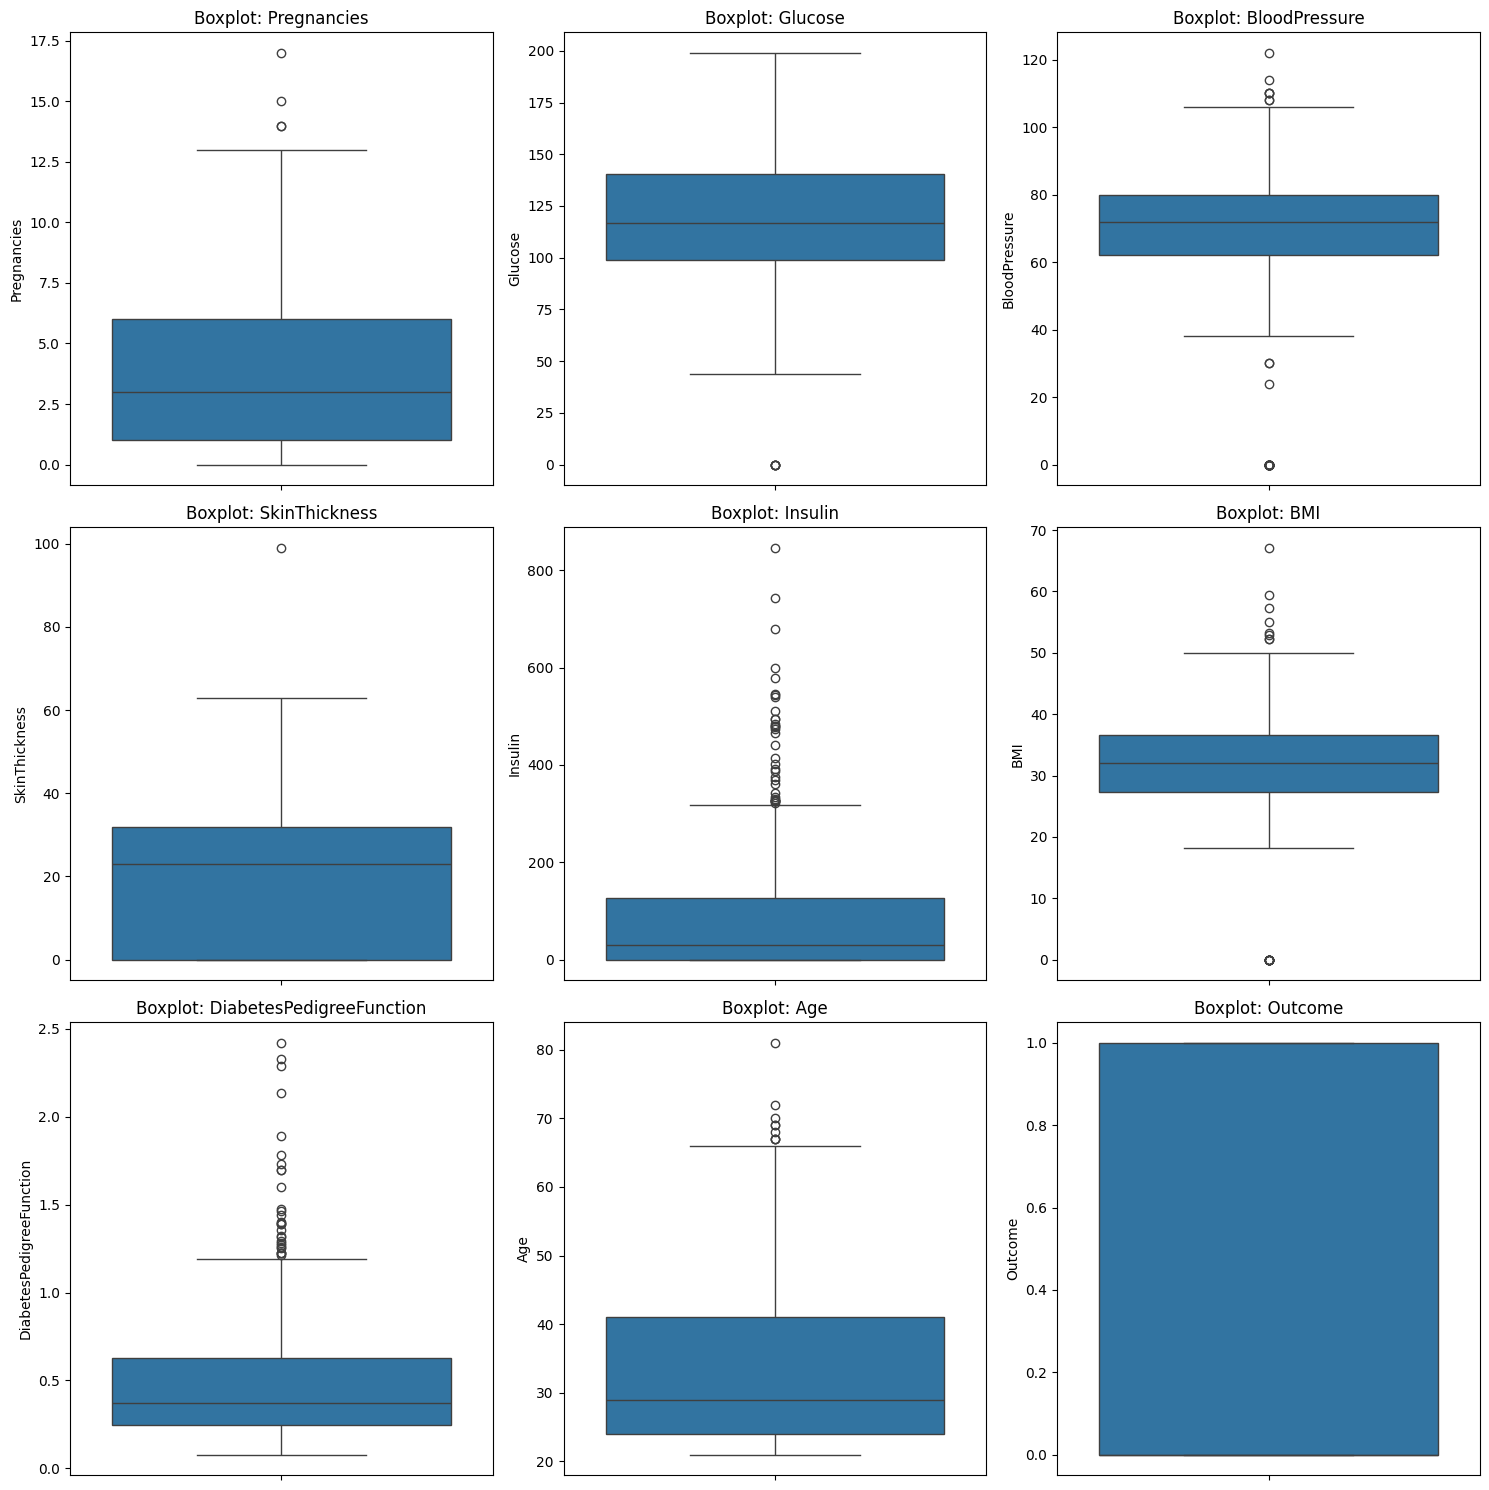

In [17]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo Pickle
pickle_file_path = "/workspaces/machine-learning-python-templane/src/dataframe_progreso.pkl"

with open(pickle_file_path, "rb") as file:
    df = pickle.load(file)

# Filtrar las columnas de tipo float64 e int64
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Configuración para subplots (3 gráficos por fila)
num_cols = 3  # Número de gráficos por fila
num_plots = len(numerical_columns.columns)  # Número total de gráficos
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular filas necesarias

# Crear el espacio para subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurar que 'axes' sea una matriz plana para iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada columna y graficar en el espacio asignado
for i, column in enumerate(numerical_columns.columns):
    sns.boxplot(data=df, y=column, ax=axes[i])  # 'y' para orientación vertical
    axes[i].set_title(f"Boxplot: {column}")

# Eliminar ejes vacíos si hay menos gráficos que espacios disponibles
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()


In [18]:
import json
 
# Copiar el dataframe para trabajar con los datos con y sin outliers
df_con_outliers = df.copy()
df_sin_outliers = df.copy()
 
# Función para reemplazar los outliers de una columna en un dataframe
def replace_outliers_from_column(column, df):
   column_stats = df[column].describe()  # Calcular estadísticas de la columna
   column_iqr = column_stats["75%"] - column_stats["25%"]  # Rango intercuartílico (IQR)
   upper_limit = column_stats["75%"] + 1.5 * column_iqr  # Límite superior
   lower_limit = column_stats["25%"] - 1.5 * column_iqr  # Límite inferior
 
   # Reemplazar los outliers superiores por el límite superior
   df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
   # Reemplazar los outliers inferiores por el límite inferior
   df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
 
   # Devuelve el dataframe modificado y los límites de los outliers
   return df.copy(), [lower_limit, upper_limit]
 
# Filtrar solo las columnas numéricas (float64 e int64)
numerical_columns = df.select_dtypes(include=["float64", "int64"]).columns
 
# Diccionario para almacenar los límites de outliers para cada columna
outliers_dict = {}
 
# Aplicar la función a cada columna numérica
for column in numerical_columns:
   df_sin_outliers, limits_list = replace_outliers_from_column(column, df_sin_outliers)
   outliers_dict[column] = limits_list  # Guardar los límites en el diccionario
 
# Guardar los límites de los outliers en un archivo JSON
with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
 
# Mostrar el diccionario con los límites de cada columna, línea por línea
print("Límites de outliers para cada columna:")
for key, value in outliers_dict.items():
   print(f"{key}: {value}")

Límites de outliers para cada columna:
Pregnancies: [np.float64(-6.5), np.float64(13.5)]
Glucose: [np.float64(37.125), np.float64(202.125)]
BloodPressure: [np.float64(35.0), np.float64(107.0)]
SkinThickness: [np.float64(-48.0), np.float64(80.0)]
Insulin: [np.float64(-190.875), np.float64(318.125)]
BMI: [np.float64(13.35), np.float64(50.550000000000004)]
DiabetesPedigreeFunction: [np.float64(-0.32999999999999996), np.float64(1.2)]
Age: [np.float64(-1.5), np.float64(66.5)]
Outcome: [np.float64(-1.5), np.float64(2.5)]


In [19]:
df_sin_outliers


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1


In [20]:
df_con_outliers.isnull().sum().sort_values(ascending=False)
df_sin_outliers.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
df.isnull().sum().sort_values(ascending=False) / len(df)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [24]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
 
# Seleccionar automáticamente las columnas numéricas (float64 e int64)
num_variables = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
 
# Eliminar 'Outcome' de las características
num_variables.remove("Outcome")  # Excluir la columna 'Outcome' del conjunto de variables
 
# Dividimos los datos en muestras de train y test
X_con_outliers = df_con_outliers[num_variables]  # Solo columnas numéricas (sin Outcome)
X_sin_outliers = df_sin_outliers[num_variables]  # Solo columnas numéricas (sin Outcome)
 
# Establecer 'Outcome' como la variable objetivo
y = df_con_outliers["Outcome"]  # 'Outcome' es ahora la variable objetivo
 
# Split (división) en conjunto de entrenamiento y prueba
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(
   X_con_outliers, y, test_size=0.2, random_state=42
)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(
   X_sin_outliers, test_size=0.2, random_state=42
)

# Guardar los conjuntos de datos resultantes en archivos Excel
output_dir = "/workspaces/machine-learning-python-templane/data/processed/"  # Ruta especificada
 
# Asegurarse de que la carpeta de salida existe
os.makedirs(output_dir, exist_ok=True)
 
# Guardar en Excel
X_train_con_outliers.to_excel(f"{output_dir}X_train_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel(f"{output_dir}X_train_sin_outliers.xlsx", index=False)
X_test_con_outliers.to_excel(f"{output_dir}X_test_con_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel(f"{output_dir}X_test_sin_outliers.xlsx", index=False)
y_train.to_excel(f"{output_dir}y_train.xlsx", index=False)
y_test.to_excel(f"{output_dir}y_test.xlsx", index=False)
 
# Mostrar una vista previa del conjunto de datos con outliers
print("Vista previa de X_train_con_outliers:")
print(X_train_con_outliers.head())

Vista previa de X_train_con_outliers:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
60             2       84              0              0        0   0.0   
618            9      112             82             24        0  28.2   
346            1      139             46             19       83  28.7   
294            0      161             50              0        0  21.9   
231            6      134             80             37      370  46.2   

     DiabetesPedigreeFunction  Age  
60                      0.304   21  
618                     1.282   50  
346                     0.654   22  
294                     0.254   65  
231                     0.238   46  


In [25]:
from sklearn.preprocessing import StandardScaler

# Normalizamos el DataFrame con outliers y lo guardamos
scaler_con_outliers = StandardScaler()
scaler_con_outliers.fit(X_train_con_outliers)
 
X_train_con_outliers_norm = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index=X_train_con_outliers.index, columns=num_variables)
 
X_test_con_outliers_norm = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index=X_test_con_outliers.index, columns=num_variables)
 
# Guardar los datasets normalizados
output_dir = "/workspaces/machine-learning-python-templane/data/processed/"  # Ruta especificada
 
# Guardar en Excel
X_train_con_outliers_norm.to_excel(f"{output_dir}X_train_con_outliers_norm.xlsx", index=False)
X_test_con_outliers_norm.to_excel(f"{output_dir}X_test_con_outliers_norm.xlsx", index=False)
 
# Normalizamos el DataFrame sin outliers y lo guardamos
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)
 
X_train_sin_outliers_norm = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index=X_train_sin_outliers.index, columns=num_variables)
 
X_test_sin_outliers_norm = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index=X_test_sin_outliers.index, columns=num_variables)
 
# Guardar los datasets normalizados
X_train_sin_outliers_norm.to_excel(f"{output_dir}X_train_sin_outliers_norm.xlsx", index=False)
X_test_sin_outliers_norm.to_excel(f"{output_dir}X_test_sin_outliers_norm.xlsx", index=False)
 
# Mostrar una vista previa del conjunto de datos normalizado con outliers
print("Vista previa de X_train_con_outliers_norm:")
print(X_train_con_outliers_norm.head())


Vista previa de X_train_con_outliers_norm:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
60     -0.526397 -1.151398      -3.752683      -1.322774 -0.701206 -4.135256   
618     1.588046 -0.276643       0.680345       0.233505 -0.701206 -0.489169   
346    -0.828460  0.566871      -1.265862      -0.090720  0.013448 -0.424522   
294    -1.130523  1.254179      -1.049617      -1.322774 -0.701206 -1.303720   
231     0.681856  0.410665       0.572222       1.076490  2.484601  1.838121   

     DiabetesPedigreeFunction       Age  
60                  -0.490735 -1.035940  
618                  2.415030  1.487101  
346                  0.549161 -0.948939  
294                 -0.639291  2.792122  
231                 -0.686829  1.139095  


In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizamos el DataFrame con outliers utilizando MinMaxScaler y lo guardamos
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)
 
X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index=X_train_con_outliers.index, columns=num_variables)
 
X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index=X_test_con_outliers.index, columns=num_variables)
 
# Guardar los datasets normalizados
output_dir = "/workspaces/machine-learning-python-templane/data/processed/"  # Ruta especificada
 
# Guardar en Excel
X_train_con_outliers_scal.to_excel(f"{output_dir}X_train_con_outliers_scal.xlsx", index=False)
X_test_con_outliers_scal.to_excel(f"{output_dir}X_test_con_outliers_scal.xlsx", index=False)
 
# Escalamos el DataFrame sin outliers utilizando StandardScaler y lo guardamos
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)
 
X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index=X_train_sin_outliers.index, columns=num_variables)
 
X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index=X_test_sin_outliers.index, columns=num_variables)
 
# Guardar los datasets normalizados
X_train_sin_outliers_scal.to_excel(f"{output_dir}X_train_sin_outliers_scal.xlsx", index=False)
X_test_sin_outliers_scal.to_excel(f"{output_dir}X_test_sin_outliers_scal.xlsx", index=False)
 
# Mostrar una vista previa del conjunto de datos escalados con outliers
print("Vista previa de X_train_con_outliers_scal:")
print(X_train_con_outliers_scal.head())

Vista previa de X_train_con_outliers_scal:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
60      0.117647  0.422111       0.000000       0.000000  0.000000  0.000000   
618     0.529412  0.562814       0.672131       0.380952  0.000000  0.420268   
346     0.058824  0.698492       0.377049       0.301587  0.098109  0.427720   
294     0.000000  0.809045       0.409836       0.000000  0.000000  0.326379   
231     0.352941  0.673367       0.655738       0.587302  0.437352  0.688525   

     DiabetesPedigreeFunction       Age  
60                   0.096499  0.000000  
618                  0.514091  0.483333  
346                  0.245944  0.016667  
294                  0.075149  0.733333  
231                  0.068318  0.416667  


In [27]:
from sklearn.feature_selection import f_regression, SelectKBest
import pandas as pd

# Con un valor de k = 5 se seleccionan las 5 mejores características
# Cambiamos f_classif por f_regression ya que trabajamos con regresión
selection_model = SelectKBest(f_regression, k=5)
 
# Ajustamos el modelo de selección de características
selection_model.fit(X_train_con_outliers, y_train)
 
# Obtenemos el soporte de las características seleccionadas
ix = selection_model.get_support()
 
# Transformar los conjuntos de datos
X_train_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns=X_train_con_outliers.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns=X_test_con_outliers.columns[ix])
 
# Vista previa de los conjuntos de datos seleccionados
print("Características seleccionadas - Conjunto de entrenamiento:")
print(X_train_sel.head())
 
print("Características seleccionadas - Conjunto de prueba:")
print(X_test_sel.head())
 
# Agregamos la variable objetivo al conjunto de datos seleccionados
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)
 
# Guardamos los conjuntos de datos en archivos CSV
output_dir = "/workspaces/machine-learning-python-templane/data/processed/"  # Ruta especificada
 
X_train_sel.to_csv(f"{output_dir}clean_train_data.csv", index=False)
X_test_sel.to_csv(f"{output_dir}clean_test_data.csv", index=False)

Características seleccionadas - Conjunto de entrenamiento:
   Pregnancies  Glucose   BMI  DiabetesPedigreeFunction   Age
0          2.0     84.0   0.0                     0.304  21.0
1          9.0    112.0  28.2                     1.282  50.0
2          1.0    139.0  28.7                     0.654  22.0
3          0.0    161.0  21.9                     0.254  65.0
4          6.0    134.0  46.2                     0.238  46.0
Características seleccionadas - Conjunto de prueba:
   Pregnancies  Glucose   BMI  DiabetesPedigreeFunction   Age
0          6.0     98.0  34.0                     0.430  43.0
1          2.0    112.0  35.7                     0.148  21.0
2          2.0    108.0  30.8                     0.158  21.0
3          8.0    107.0  24.6                     0.856  34.0
4          7.0    136.0  29.9                     0.210  50.0
